In [74]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
from arch import arch_model

data = pdr.get_data_yahoo(['^GSPC'], start="2018-01-01", end=dt.date.today())['Adj Close']

returns = (np.log(data/data.shift(1))).dropna()

returns

Symbols,^GSPC
Date,
2018-01-03,0.006378
2018-01-04,0.004021
2018-01-05,0.007009
2018-01-08,0.001661
2018-01-09,0.001302
...,...
2021-12-16,-0.008782
2021-12-17,-0.010341
2021-12-20,-0.011453


In [75]:
arch = arch_model(y = returns, mean = 'Constant', lags = 0, vol = 'ARCH', p = 1, o = 0, dist = 'normal' ,rescale=False )
archmodel = arch.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 487754803798.54144
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3269544397.411824
Iteration:      3,   Func. Count:     28,   Neg. LLF: -2101.1124589713168
Iteration:      4,   Func. Count:     36,   Neg. LLF: -1101.7368191589846
Iteration:      5,   Func. Count:     44,   Neg. LLF: -3102.2966531493817
Iteration:      6,   Func. Count:     49,   Neg. LLF: -2854.5575868122864
Iteration:      7,   Func. Count:     56,   Neg. LLF: -3107.308592401875
Iteration:      8,   Func. Count:     60,   Neg. LLF: -3107.3086312336522
Iteration:      9,   Func. Count:     63,   Neg. LLF: -3107.308631233682
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3107.3086312336522
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 9


In [76]:
print(archmodel.summary())
print(archmodel.params)


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                3107.31
Distribution:                  Normal   AIC:                          -6208.62
Method:            Maximum Likelihood   BIC:                          -6193.89
                                        No. Observations:                 1001
Date:                Wed, Dec 22 2021   Df Residuals:                     1000
Time:                        19:36:56   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.4214e-03  3.483e-04      4.081  4.482e-05 [7.

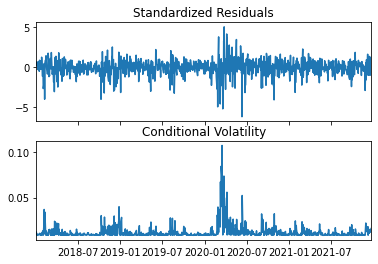

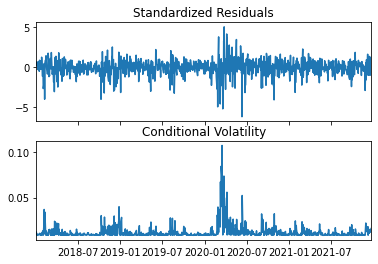

In [77]:
archmodel.plot()

In [78]:
garch=arch_model(y=returns,mean='Constant',lags=0,vol='GARCH',p=1,o=0,q=1,dist='normal', rescale = False)


In [79]:
garchmodel=garch.fit()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 20078252091.4237
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1266418554.9962692
Iteration:      3,   Func. Count:     31,   Neg. LLF: 35616296.86097279
Iteration:      4,   Func. Count:     43,   Neg. LLF: 496319960.3392635
Iteration:      5,   Func. Count:     55,   Neg. LLF: 12677995.401051462
Iteration:      6,   Func. Count:     66,   Neg. LLF: -3245.5772488023586
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3245.5772481769536
            Iterations: 10
            Function evaluations: 66
            Gradient evaluations: 6


In [80]:
print(garchmodel.summary())
print(garchmodel.params)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  ^GSPC   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3245.58
Distribution:                  Normal   AIC:                          -6483.15
Method:            Maximum Likelihood   BIC:                          -6463.52
                                        No. Observations:                 1001
Date:                Wed, Dec 22 2021   Df Residuals:                     1000
Time:                        19:37:04   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0589e-03  4.592e-07   2305.947      0.000 [1.

In [81]:
# Garch: sigma^2 = omega + alpha * return-1^2 + beta * sigma-1^2
# long term vol = sqrt(omega/(1 - alpha - beta))

long_vol = np.sqrt(garchmodel.params[1]/(1 - garchmodel.params[2] - garchmodel.params[3]))

print(long_vol)

0.013480081305407675


In [90]:
#EWMA sigma^2 = lambda * sigma-1^2 + (1-lambda) * return-1^2

#EMWA 


